<a href="https://colab.research.google.com/github/Eambr/little_lab/blob/main/Little_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Esploriamo le curve di luce di alcuni sistemi binari

In [ ]:
import pandas as pd

url = "https://swift.gsfc.nasa.gov/results/transients/HerX-1.lc.txt"

# Legge il file, ignorando tutte le righe di commento che iniziano con '#'
df = pd.read_csv(url, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))



# Mostra le prime righe
print(df.head())


In [ ]:
#cosa vediamo?
df.keys()

Rinomiamo le colonne

In [ ]:

df.rename(columns={"#": "time", "TIME": "rate", "RATE": "error"}, inplace=True)

In [ ]:
df.keys()
df = df.apply(pd.to_numeric, errors='coerce')

# Rimuove eventuali righe con valori NaN
df = df.dropna()

In [ ]:
df

Ora visualizziamo i dati che abbiamo scaricato.
In gergo diremo che 'plottiamo' i dati.
Vogliamo capire come varia la curva di luce nel tempo:
quindi sull'asse X mettiamo il tempo
sull'asse y i conteggi/al secondo (detti anche count-rate):
ossia il Numero di fotoni che colpiscono il detector per ogni secondo

In [ ]:
#Libreria per fare i grafici : matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="blue")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title("Swift/BAT light curve — Her X-1")
plt.grid(True)
plt.show()

Gli astronomi per comodità non utilizzano le date nel modo un cui siamo abituati: ossia giorno, mese anno, ora.
Bensì utilizzano un 'tempo standard', l' MJD.

Vogliamo capire a cosa corrispondono quei giorni
sul nostro calendario:


In [ ]:
from astropy.time import Time
t = Time(df["time"], format="mjd")
t.isot

Ora restringiamo l'intervallo temporale per rendere la curva di luce meno compressa e capire come si comporta, com'è il suo andamento.

In [ ]:
plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="blue")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title("Swift/BAT light curve — Her X-1")
plt.xlim(54000,54300)
plt.grid(True)
plt.show()

Sappiamo che questa sorgente ha una curva di luce periodica, ossia che si ripete ogni periodo.


In [ ]:

Psup = 35.1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# === PARAMETERS ===
P = 35.1        # Period in days
t0 = df["time"].min()  # Reference epoch (you can change it)

# === Compute phase ===
df["phase"] = ((df["time"] - t0) / P) % 1.0

# === Bin the data in phase ===
nbins = 30
bins = np.linspace(0, 1, nbins + 1)
bin_means, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="mean", bins=bins)
bin_stds, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="std", bins=bins)
bin_counts, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="count", bins=bins)
bin_err = bin_stds / np.sqrt(bin_counts)   # Standard error of mean

# === Compute bin centers ===
phase_centers = 0.5 * (bins[1:] + bins[:-1])

# === Duplicate folded curve for two cycles (0–2) ===

phase_double = np.concatenate([phase_centers, phase_centers + 1.0])
rate_double = np.concatenate([bin_means, bin_means])
err_double = np.concatenate([bin_err, bin_err])

plt.errorbar(phase_double, rate_double, yerr=err_double, fmt='o', color='blue',
             ecolor='gray', elinewidth=1, capsize=2, markersize=4)
plt.xlabel("Phase")
plt.ylabel("Rate (count cm$^{-2}$ s$^{-1}$)")
plt.title(f"Folded Swift/BAT light curve (P = {P:.2f} days, shown twice)")
plt.grid(True)
plt.xlim(0, 2)
plt.show()


Ora tocca a voi:
Istruzioni:
L'elenco dei sistemi binari monitorati dallo strumento BAT si
trova in questa [pagina](https://swift.gsfc.nasa.gov/results/transients/)

1. Ora analizziamo i seguenti sistemi binari:

*   LMC X-4: https://swift.gsfc.nasa.gov/results/transients/LMCX-4.lc.txt
*   SMC X-1: https://swift.gsfc.nasa.gov/results/transients/SMCX-1.lc.txt
*   Swift J0243.6 + 6124: https://swift.gsfc.nasa.gov/results/transients/weak/SwiftJ0243.6p6124.lc.txt

2. plotta la curva di luce intera
3. plotta la curva di luce in un intervallo di date
   per capire se ci sono delle ripetizioni
4. riesci ad intuire una certa periodicità?
5. proviamo a ripiegare la curva di luce sul periodo trovato





**LMC X-4** è un sistema binario che si trova
bella Grande Nube di Magellano.
LMC : Large Magellanic Cloud

Le nubi di Magellano sono due Galassie satellite della nostra
galassia, e sono viaibili ad occhio nudo nell'emisfero meridionale.
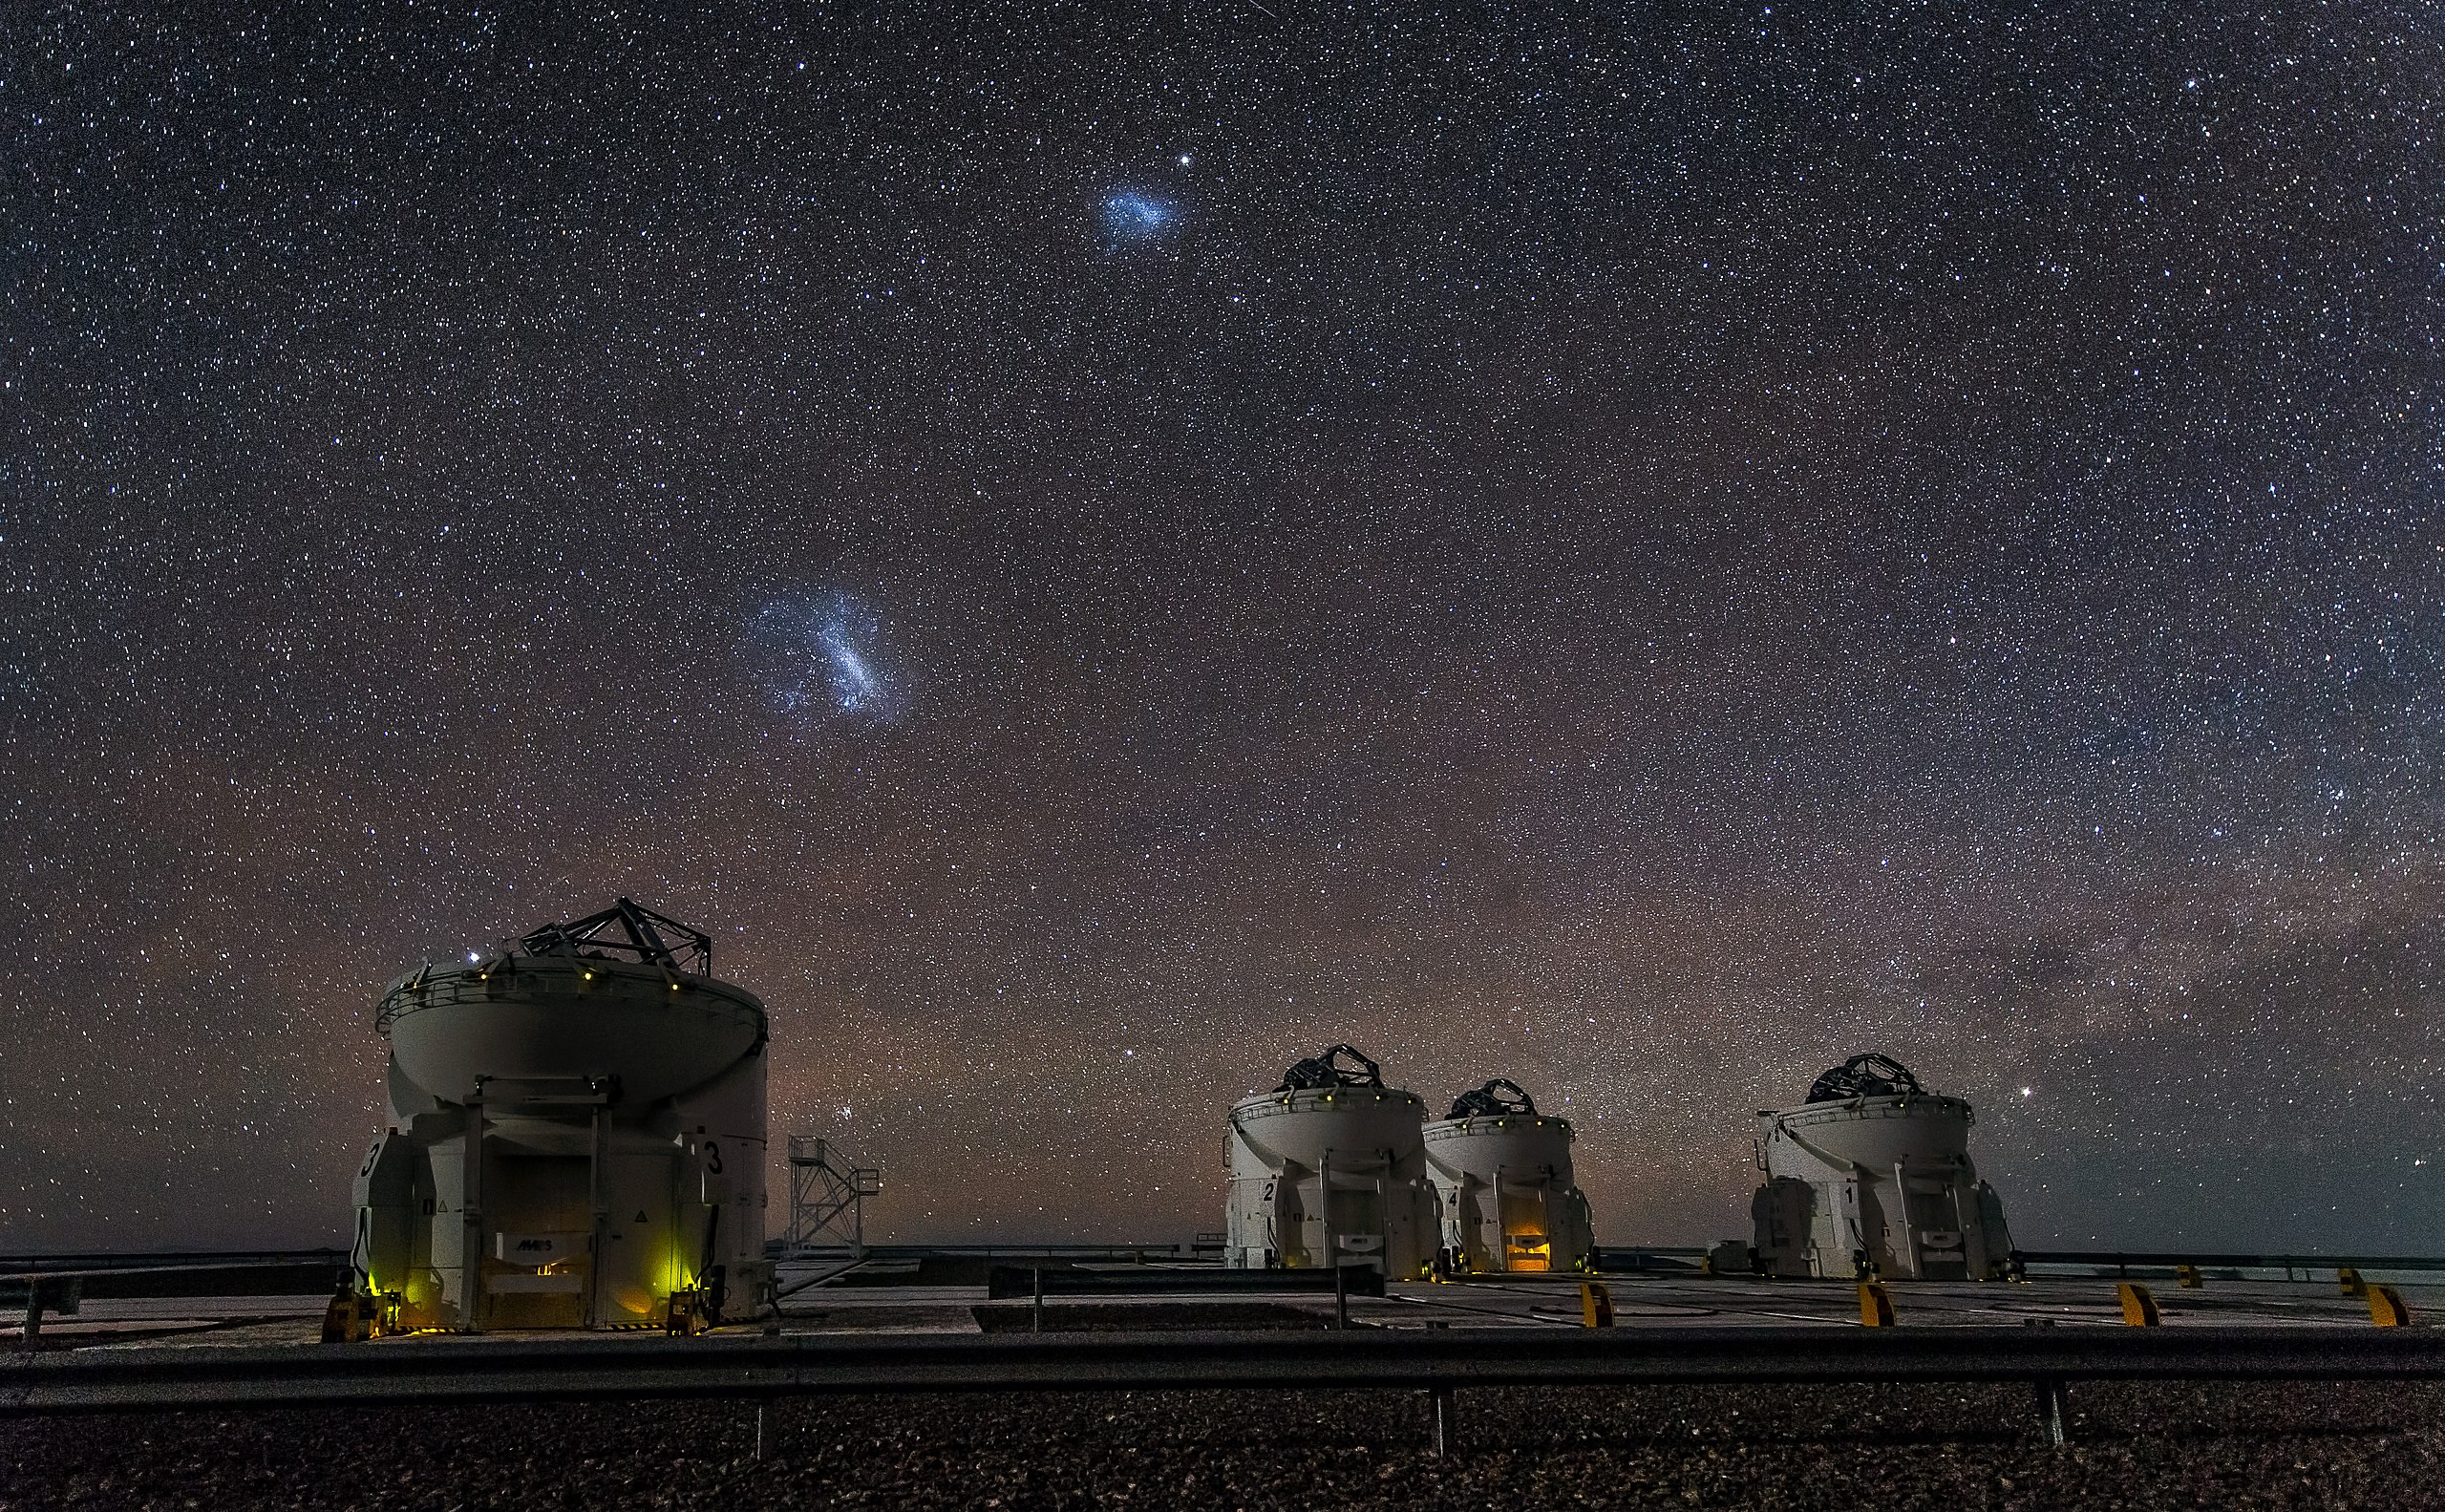

In [ ]:

source_name ="LMC X-4"

url2 = "https://swift.gsfc.nasa.gov/results/transients/LMCX-4.lc.txt"

# Legge il file, ignorando tutte le righe di commento che iniziano con '#'
df = pd.read_csv(url2, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))



# Mostra le prime righe
print(df.head())

df.rename(columns={"#": "time", "TIME": "rate", "RATE": "error"}, inplace=True)
df.keys()
df = df.apply(pd.to_numeric, errors='coerce')

# Rimuove eventuali righe con valori NaN
df = df.dropna()

plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="violet")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.xlim( )
plt.ylim(-0.05,0.05)
plt.grid(True)
plt.show()

Riesci a capire, da questo grafico, il periodo di questa curva?
**Prova a restringere il limite sull'asse X**

In [ ]:
plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="violet")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.xlim(55000,56000)
plt.ylim(-0.05,0.05)
plt.grid(True)
plt.show()

In [ ]:

# === PARAMETERS ===
P = 30.5       # Period in days
t0 = df["time"].min()  # Reference epoch (you can change it)

# === Compute phase ===
df["phase"] = ((df["time"] - t0) / P) % 1.0

# === Bin the data in phase ===
nbins = 30
bins = np.linspace(0, 1, nbins + 1)
bin_means, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="mean", bins=bins)
bin_stds, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="std", bins=bins)
bin_counts, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="count", bins=bins)
bin_err = bin_stds / np.sqrt(bin_counts)   # Standard error of mean

# === Compute bin centers ===
phase_centers = 0.5 * (bins[1:] + bins[:-1])
phase_double = np.concatenate([phase_centers, phase_centers + 1.0])
rate_double = np.concatenate([bin_means, bin_means])
err_double = np.concatenate([bin_err, bin_err])

plt.errorbar(phase_double, rate_double, yerr=err_double, fmt='o', color='violet',
             ecolor='gray', elinewidth=1, capsize=2, markersize=4)
plt.xlabel("Phase")
plt.ylabel("Rate (count cm$^{-2}$ s$^{-1}$)")
plt.title(f"Folded Swift/BAT light curve (P = {P:.2f} days, shown twice)")
plt.grid(True)
plt.xlim(0, 2)
plt.show()

In [ ]:

source_name ="SMC X-1"

url2 = "https://swift.gsfc.nasa.gov/results/transients/SMCX-1.lc.txt"

# Legge il file, ignorando tutte le righe di commento che iniziano con '#'
df = pd.read_csv(url2, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))



# Mostra le prime righe
print(df.head())

df.rename(columns={"#": "time", "TIME": "rate", "RATE": "error"}, inplace=True)
df.keys()
df = df.apply(pd.to_numeric, errors='coerce')

# Rimuove eventuali righe con valori NaN
df = df.dropna()

plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="coral")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="coral")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.xlim(55000,56000)
plt.ylim(-0.05,0.05)
plt.grid(True)
plt.show()

Riesci a visualizzare una periodicità?

In [ ]:

# === PARAMETERS ===
P = 55       # Period in days
t0 = df["time"].min()  # Reference epoch (you can change it)

# === Compute phase ===
df["phase"] = ((df["time"] - t0) / P) % 1.0

# === Bin the data in phase ===
nbins = 30
bins = np.linspace(0, 1, nbins + 1)
bin_means, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="mean", bins=bins)
bin_stds, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="std", bins=bins)
bin_counts, _, _ = stats.binned_statistic(df["phase"], df["rate"], statistic="count", bins=bins)
bin_err = bin_stds / np.sqrt(bin_counts)   # Standard error of mean

# === Compute bin centers ===
phase_centers = 0.5 * (bins[1:] + bins[:-1])
phase_double = np.concatenate([phase_centers, phase_centers + 1.0])
rate_double = np.concatenate([bin_means, bin_means])
err_double = np.concatenate([bin_err, bin_err])

plt.errorbar(phase_double, rate_double, yerr=err_double, fmt='o', color='orange',
             ecolor='gray', elinewidth=1, capsize=2, markersize=4)
plt.xlabel("Phase")
plt.ylabel("Rate (count cm$^{-2}$ s$^{-1}$)")
plt.title(f"Folded Swift/BAT light curve (P = {P:.2f} days, shown twice)")
plt.grid(True)
plt.xlim(0, 2)
plt.show()

**Swift J0243.6 + 6124**

In [ ]:
source_name = "Swift J0243.6 + 6124 "
url2 = "https://swift.gsfc.nasa.gov/results/transients/weak/SwiftJ0243.6p6124.lc.txt"

# Legge il file, ignorando tutte le righe di commento che iniziano con '#'
df = pd.read_csv(url2, delim_whitespace=True, skiprows =[0, 1, 2, 4], usecols= (0,1,2))




print(df.head())

df.rename(columns={"#": "time", "TIME": "rate", "RATE": "error"}, inplace=True)
df.keys()
df = df.apply(pd.to_numeric, errors='coerce')

# Rimuove eventuali righe con valori NaN
df = df.dropna()

plt.figure(figsize=(10,5))
plt.errorbar(df['time'], df['rate'], yerr=df['error'], fmt=".", alpha=0.7, color="purple")
plt.xlabel("MJD")
plt.ylabel("BAT rate (count/cm²/s)")
plt.title(f"Swift/BAT light curve — {source_name}")
plt.grid(True)
plt.show()

 # Ora tocca a te
 Analizza questa curva di luce aiutandoti con i pezzi di codice
 che hai appena utilizzato.
 Come descriveresti questa curva di luce?
 E' periodica? E' costante?
 Cosa sta accadendo secondo te?
 Copia le celle che pensi possano servire per
 esplorare questa curva di luce.
